*   Name : Anuj Ramane
*   Roll No. : 22102A2003
*   Div : TE CMPN-A
---



#**ML LAB Problem Statment 1 : Predicting Housing Prices Using Linear Regression**

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [51]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [52]:
df.shape

(20640, 10)

In [53]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# **Handling Missing Values**

In [54]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

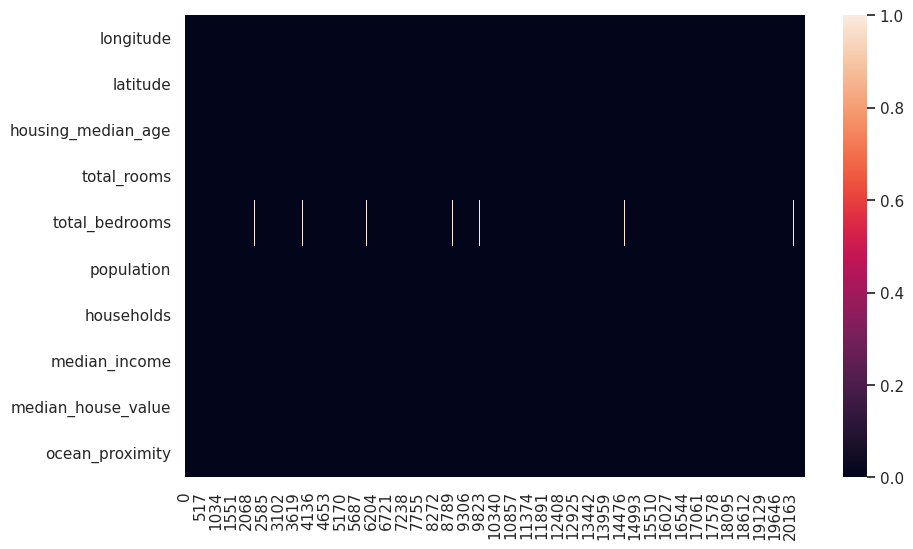

In [55]:
# Showing missing data with heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose());

In [56]:
# We can fill them with Mean value
df.total_bedrooms.fillna(df.total_bedrooms.mean(), inplace=True)
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [57]:
# Checking for duplicates
df.duplicated().sum()

0

# **Handling Outliers**

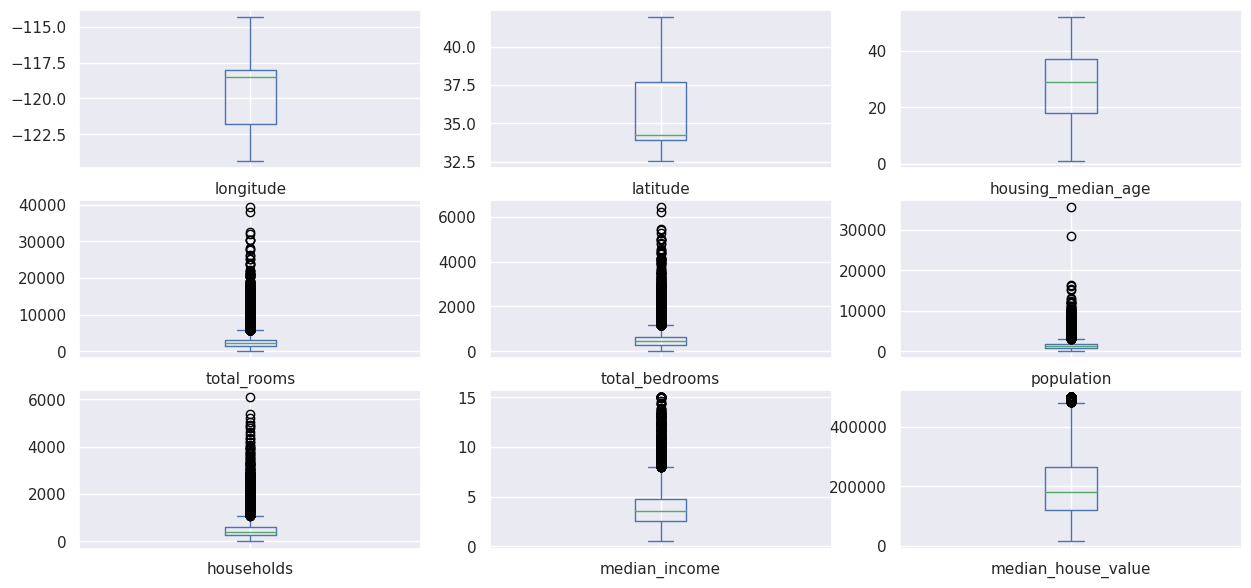

In [58]:
# Checking for outliers
df.plot(kind='box', subplots=True, layout=(3,3), figsize=(15,7))
plt.show()

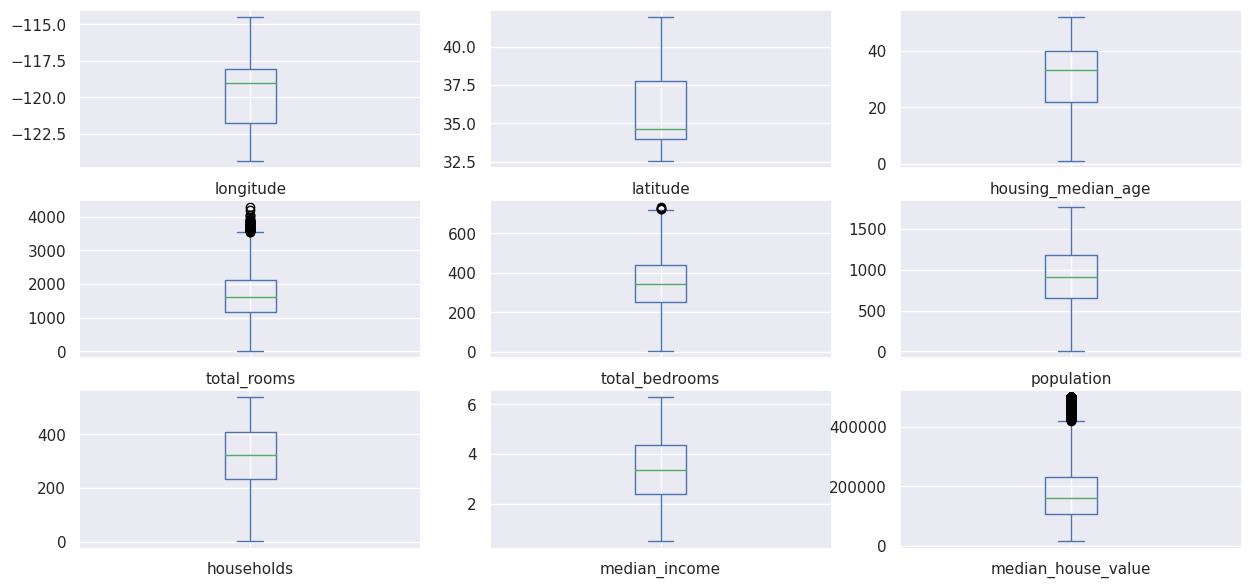

In [59]:
# Removing data bigger than 90% of column
df=df[df['total_rooms']<df['total_rooms'].quantile(0.9)]
df=df[df['total_bedrooms']<df['total_bedrooms'].quantile(0.9)]
df=df[df['population']<df['population'].quantile(0.9)]
df=df[df['households']<df['households'].quantile(0.9)]
df=df[df['median_income']<df['median_income'].quantile(0.9)]

df.plot(kind='box', subplots=True, layout=(3,3), figsize=(15,7))
plt.show()

# **EDA**

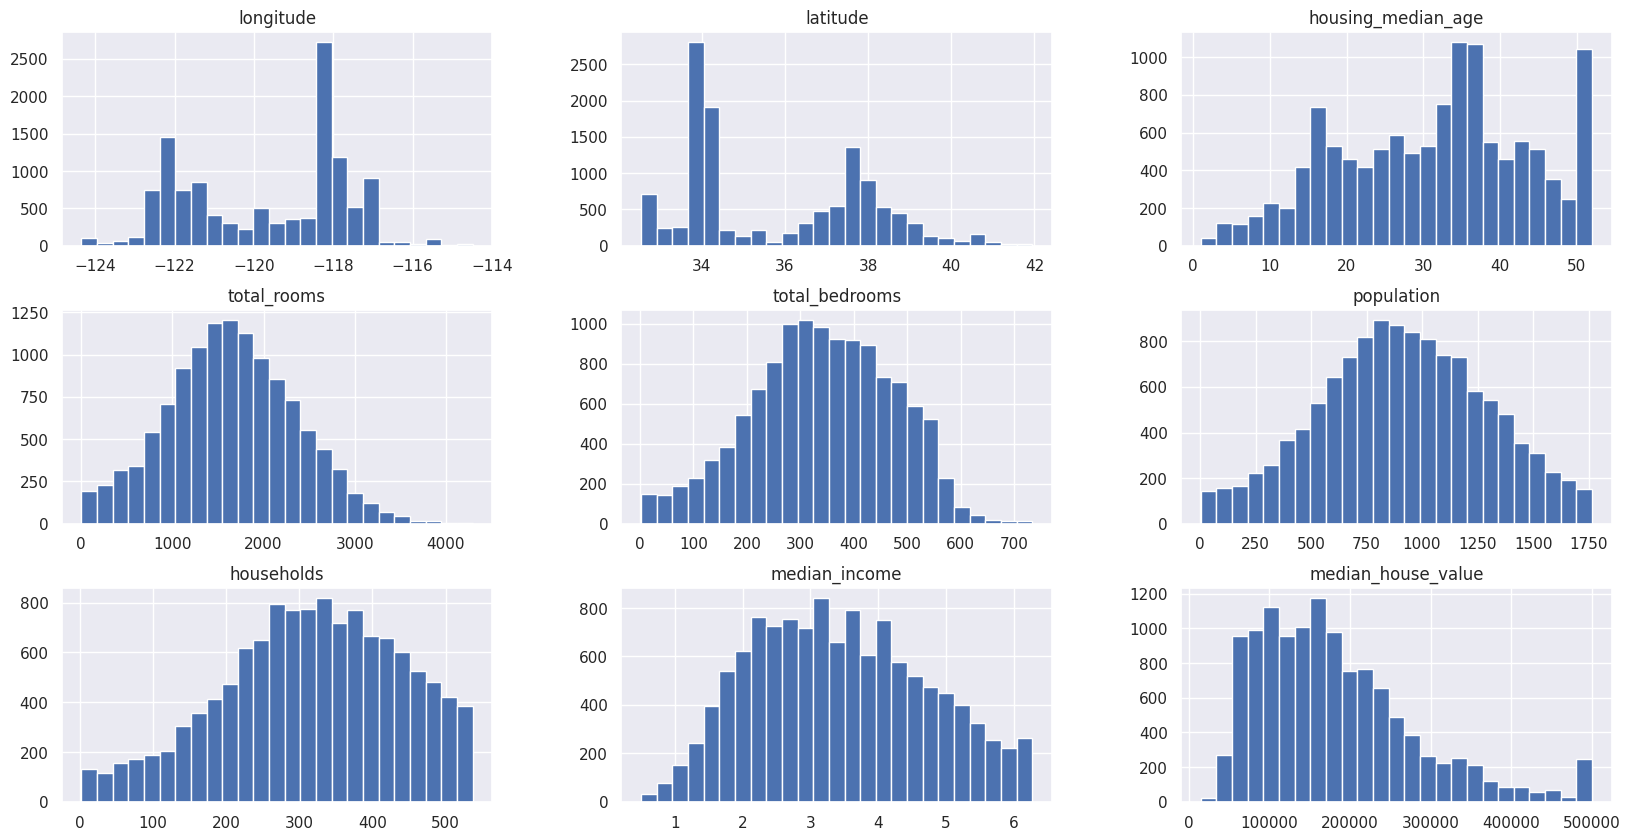

In [60]:
df.hist(bins=25,figsize=(20,10));

Text(0.5, 1.0, 'Linear correlation Median income/Median House value')

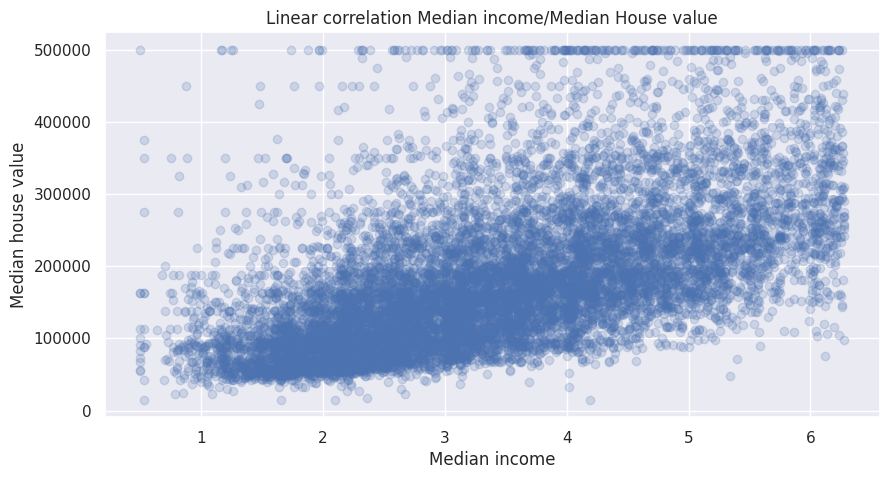

In [61]:
# Checking scatter plot between median_income and median_house_value
plt.figure(figsize=(10,5))
plt.scatter(df["median_income"],df["median_house_value"], alpha=0.2)
plt.xlabel('Median income')
plt.ylabel('Median house value')
plt.title('Linear correlation Median income/Median House value')

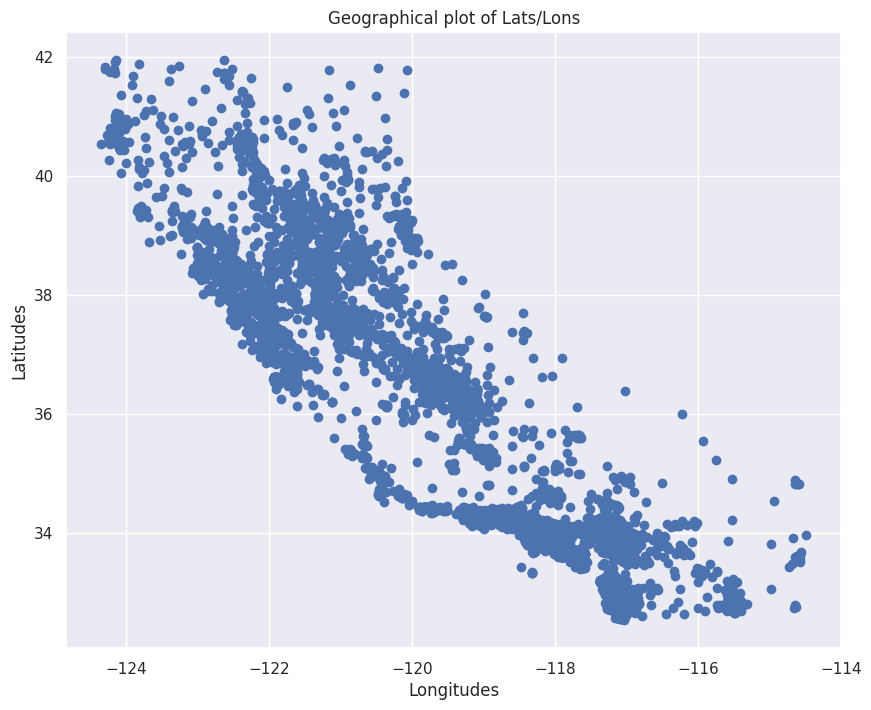

In [62]:
sns.set()
plt.figure(figsize=(10,8))
plt.scatter('longitude','latitude',data=df)
plt.ylabel('Latitudes')
plt.xlabel('Longitudes')
plt.title('Geographical plot of Lats/Lons')
plt.show()

# **Encoding Categorical Variables**

In [63]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df["ocean_proximity"] = le.fit_transform(df["ocean_proximity"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12166 entries, 3 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           12166 non-null  float64
 1   latitude            12166 non-null  float64
 2   housing_median_age  12166 non-null  float64
 3   total_rooms         12166 non-null  float64
 4   total_bedrooms      12166 non-null  float64
 5   population          12166 non-null  float64
 6   households          12166 non-null  float64
 7   median_income       12166 non-null  float64
 8   median_house_value  12166 non-null  float64
 9   ocean_proximity     12166 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.0 MB


<Axes: >

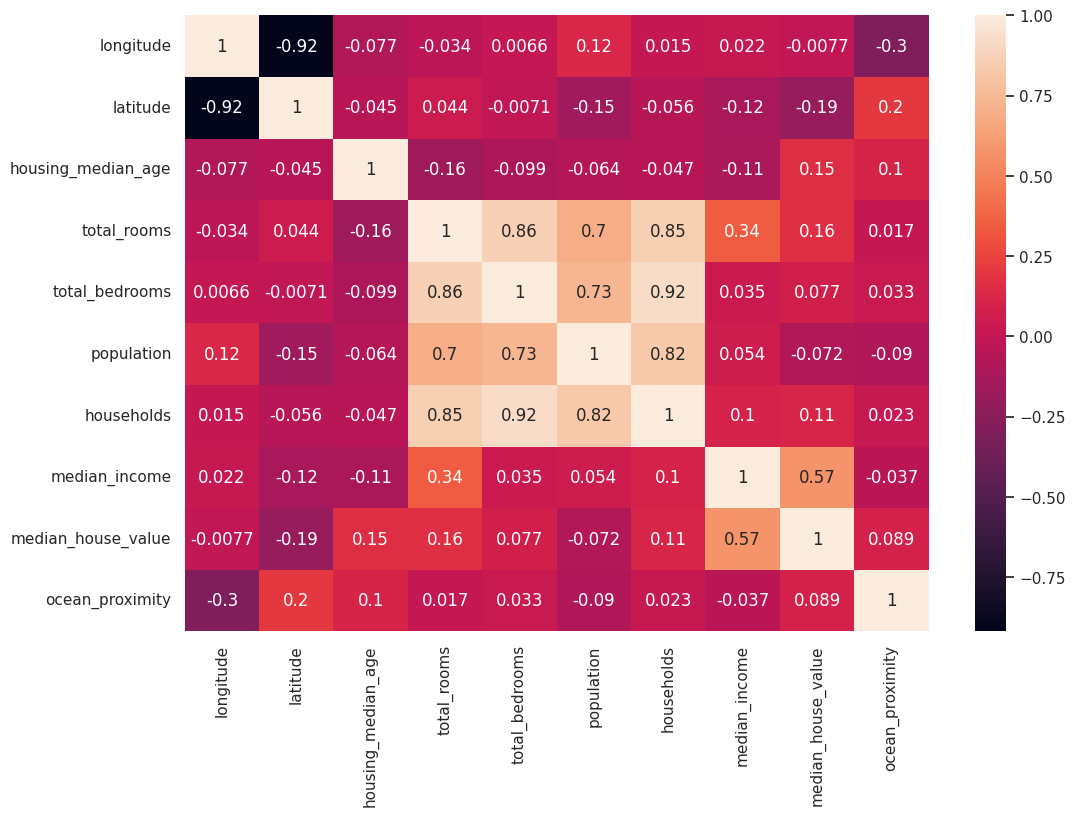

In [64]:
#visualize the correlation
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)

# **Dropping Unused columns and Target Column**

In [65]:
Y = df["median_house_value"]
X = df.drop(["longitude", "latitude", "median_house_value"], axis = 1)

# **Spliting Data in Training and Testing**

In [66]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size= 0.20, random_state=42)

# Performing Data Scaling using Robust Scaler
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
X_Train = rs.fit_transform(X_Train)
X_Test = rs.fit_transform(X_Test)

# **Linear Regression Model**

In [67]:
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr.fit(X_Train, Y_Train)

LinearRegression()

In [68]:
lr.score(X_Train, Y_Train)

0.46805440682982724

In [69]:
lr.score(X_Test, Y_Test)

0.47222302550247053

In [70]:
Y_Pred1 = lr.predict(X_Test)
Y_Test_Pred = pd.DataFrame({"Y_Test": Y_Test, "Y_Pred": Y_Pred1})
Y_Test_Pred.head()

,Y_Test,Y_Pred
3864,277300.0,209433.936427
6427,130100.0,128819.719316
7484,118100.0,123930.971462
8409,162500.0,88367.076229
17357,193000.0,196782.723969


In [71]:
Y_Test_Pred = Y_Test_Pred.reset_index()

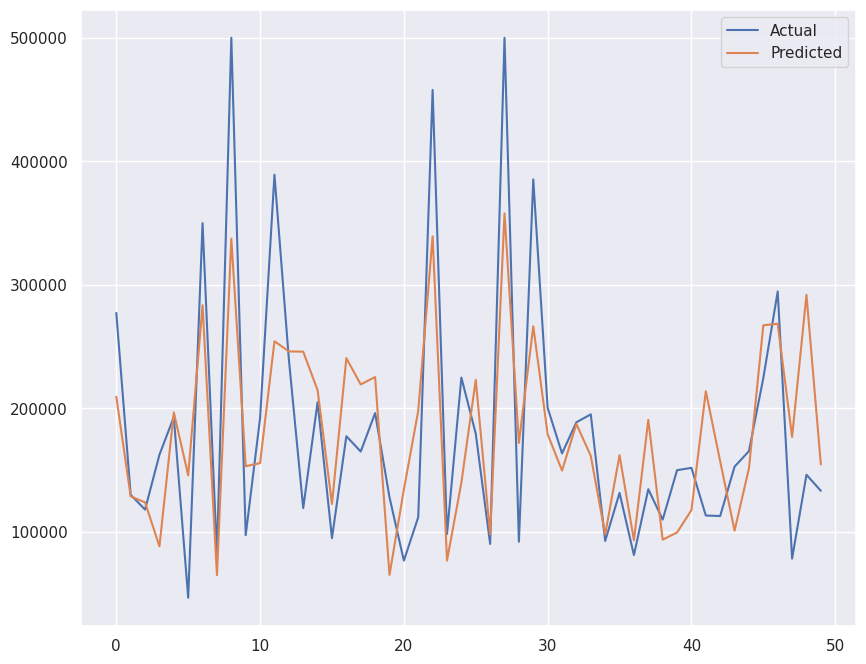

In [72]:
plt.figure(figsize=(10, 8))
Y_Test_Pred = Y_Test_Pred.drop(["index"], axis=1)
plt.plot(Y_Test_Pred[:50])
plt.legend(["Actual", "Predicted"])

# **R-Square**

In [73]:
from sklearn.metrics import r2_score
reg_score = r2_score(Y_Test , Y_Pred1)
reg_score

0.47222302550247053

In [74]:
#adjusted r2
p = len(X_Train[0])
n = len(Y_Train)
adj_R2 = 1-(1-reg_score)*(n-1)/(n-p-1)
adj_R2

0.47184309555373727

# **MSE & MAE**

In [75]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error

mse = mean_squared_error(Y_Test , Y_Pred1)
print("mse: ", mse)
mae = mean_absolute_error(Y_Test , Y_Pred1)
print("mae: ", mae)
mape = mean_absolute_percentage_error(Y_Test , Y_Pred1)
print("mape: ", mape)

mse:  5139056780.779381
mae:  53178.47335864126
mape:  0.36865688206870967


# **User Input for Predicting House Price**

In [76]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display

housing_median_age_input = widgets.FloatText(description="Housing Median Age:")
total_rooms_input = widgets.FloatText(description="Total Rooms:")
total_bedrooms_input = widgets.FloatText(description="Total Bedrooms:")
population_input = widgets.FloatText(description="Population:")
households_input = widgets.FloatText(description="Households:")
median_income_input = widgets.FloatText(description="Median Income:")
ocean_proximity_input = widgets.Dropdown(
    options=[0, 1, 2, 3, 4],
    description="Ocean Proximity:",
)

predict_button = widgets.Button(description="Predict")

# Display the input widgets
display(housing_median_age_input,
        total_rooms_input, total_bedrooms_input, population_input,
        households_input, median_income_input, ocean_proximity_input,
        predict_button)

def predict_house_price(sender):
    input_data = np.array([[
        housing_median_age_input.value,
        total_rooms_input.value,
        total_bedrooms_input.value,
        population_input.value,
        households_input.value,
        median_income_input.value,
        ocean_proximity_input.value
    ]])

    input_data_scaled = rs.transform(input_data)

    prediction = lr.predict(input_data_scaled)

    print("Predicted House Price:", prediction[0])

predict_button.on_click(predict_house_price)


FloatText(value=0.0, description='Housing Median Age:')

FloatText(value=0.0, description='Total Rooms:')

FloatText(value=0.0, description='Total Bedrooms:')

FloatText(value=0.0, description='Population:')

FloatText(value=0.0, description='Households:')

FloatText(value=0.0, description='Median Income:')

Dropdown(description='Ocean Proximity:', options=(0, 1, 2, 3, 4), value=0)

Button(description='Predict', style=ButtonStyle())

Predicted House Price: 350499.2348154383


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
